In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from itertools import chain
from matplotlib.patches import Ellipse


sns.set_context('notebook')
sns.set_style('white')

In [2]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_univariate_mixture(means, stds, weights, N = 10000, seed=10):
    
    """
    returns the simulated 1d dataset X, a figure, and the figure's ax
    
    """
    np.random.seed(seed)
    if not len(means)==len(stds)==len(weights):
        raise Exception("Length of mean, std, and weights don't match.") 
    K = len(means)
    
    mixture_idx = np.random.choice(K, size=N, replace=True, p=weights)
    # generate N possible values of the mixture
    X = np.fromiter((ss.norm.rvs(loc=means[i], scale=stds[i]) for i in mixture_idx), dtype=np.float64)
      
    # generate values on the x axis of the plot
    xs = np.linspace(X.min(), X.max(), 300)
    ps = np.zeros_like(xs)
    
    for mu, s, w in zip(means, stds, weights):
        ps += ss.norm.pdf(xs, loc=mu, scale=s) * w
    
    fig, ax = plt.subplots()
    ax.plot(xs, ps, label='pdf of the Gaussian mixture')
    ax.set_xlabel("X", fontsize=15)
    ax.set_ylabel("P", fontsize=15)
    ax.set_title("Univariate Gaussian mixture", fontsize=15)
    #plt.show()
    
    return X.reshape(-1,1), fig, ax
    
    
def plot_bivariate_mixture(means, covs, weights, N = 10000, seed=10):
    
    """
    returns the simulated 2d dataset X and a scatter plot is shown
    
    """
    np.random.seed(seed)
    if not len(mean)==len(covs)==len(weights):
        raise Exception("Length of mean, std, and weights don't match.") 
    K = len(means)
    M = len(means[0])
    
    mixture_idx = np.random.choice(K, size=N, replace=True, p=weights)
    
    # generate N possible values of the mixture
    X = np.fromiter(chain.from_iterable(multivariate_normal.rvs(mean=means[i], cov=covs[i]) for i in mixture_idx), 
                dtype=float)
    X.shape = N, M
    
    xs1 = X[:,0] 
    xs2 = X[:,1]
    
    plt.scatter(xs1, xs2, label="data")
    
    L = len(means)
    for l, pair in enumerate(means):
        plt.scatter(pair[0], pair[1], color='red')
        if l == L-1:
            break
    plt.scatter(pair[0], pair[1], color='red', label="mean")
    
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("Scatter plot of the bivariate Gaussian mixture")
    plt.legend()
    plt.show()
    
    return X


def draw_ellipse(position, covariance, ax=None, **kwargs):
    
    """
    Draw an ellipse with a given position and covariance
    
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


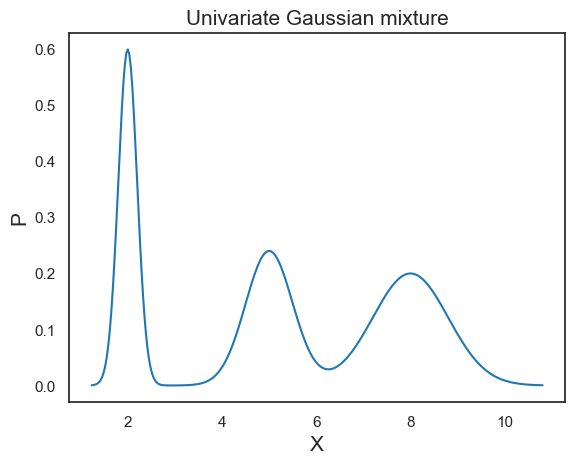

In [3]:
X1, fig1, ax1 = plot_univariate_mixture(means=[2, 5, 8], stds=[0.2, 0.5, 0.8], weights=[0.3, 0.3, 0.4])

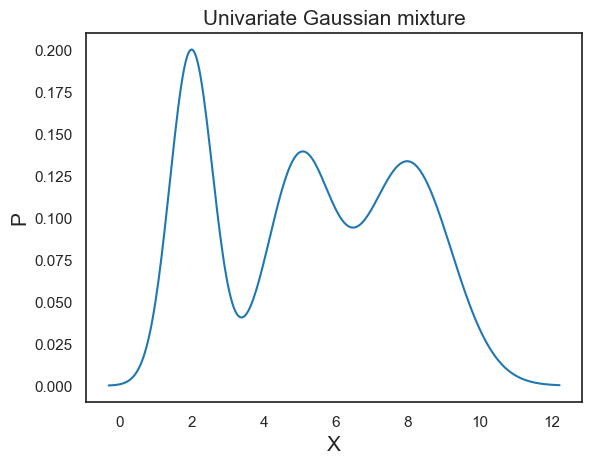

In [4]:
X2, fig2, ax2 = plot_univariate_mixture(means=[2,5,8], stds=[0.6, 0.9, 1.2], weights=[0.3, 0.3, 0.4]) 

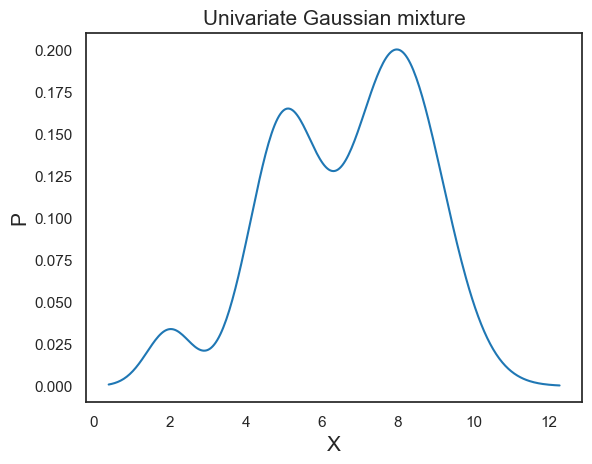

In [5]:
X3, fig3, ax3 = plot_univariate_mixture(means=[2,5,8], stds=[0.6, 0.9, 1.2], weights=[0.05, 0.35, 0.6]) 

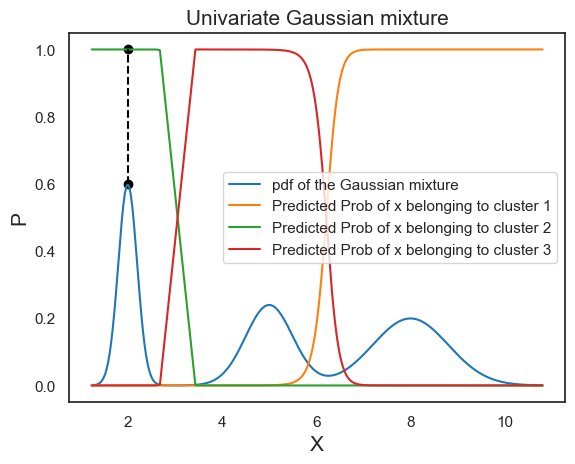

In [6]:
# sort X1 in ascending order for plotting purpose
X1_sorted = np.sort(X1.reshape(-1)).reshape(-1,1)

# fit the GMM
GMM = GaussianMixture(n_components=3, random_state=10)
GMM.fit(X1_sorted)

# store the predicted probabilities in prob_X1
prob_X1 = GMM.predict_proba(X1_sorted)

# start plotting! 
ax1.plot(X1_sorted, prob_X1[:,0], label='Predicted Prob of x belonging to cluster 1')
ax1.plot(X1_sorted, prob_X1[:,1], label='Predicted Prob of x belonging to cluster 2')
ax1.plot(X1_sorted, prob_X1[:,2], label='Predicted Prob of x belonging to cluster 3')
ax1.scatter(2, 0.6, color='black')
ax1.scatter(2, 1.0, color='black')
ax1.plot([2, 2], [0.6, 1.0],'--', color='black')
ax1.legend()
fig1

In [11]:

mean = [(1,5), (2,1), (6,2)]
cov1 = np.array([[0.5, 1.0],[1.0, 0.8]])
cov2 = np.array([[0.8, 0.4],[0.4, 1.2]])
cov3 = np.array([[1.2, 1.3],[1.3, 0.9]])
cov = [cov1, cov2, cov3]
weights = [0.3, 0.3, 0.4]

X4 = plot_bivariate_mixture(means=mean, covs=cov, weights=weights, N=1000)                    

ValueError: The input matrix must be symmetric positive semidefinite.

In [8]:
print("The dataset we generated has a shape of", X4.shape)

NameError: name 'X4' is not defined

In [9]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X4)
print("Means of the 3 Gaussians fitted by GMM are\n")
print(gm.means_)

NameError: name 'X4' is not defined

In [12]:
print("Covariances of the 3 Gaussians fitted by GMM are")
gm.covariances_

Covariances of the 3 Gaussians fitted by GMM are


NameError: name 'gm' is not defined

In [13]:
plot_gmm(GaussianMixture(n_components=3, random_state=0), # the model, 
          X4) # simulated Gaussian mixture data

NameError: name 'X4' is not defined

In [ ]:
# try Covariance_type = 'tied'
plot_gmm(GaussianMixture(n_components=3, covariance_type='tied',random_state=0), # the model, 
         X4)

In [ ]:
# try Covariance_type = 'diag'
plot_gmm(GaussianMixture(n_components=3, covariance_type='diag',random_state=0), # the model, 
         X4)

## Example 2: Applying GMM on real world data - Image Segmentation
Image segmentation is the process of segmenting an image into multiple important regions.

We can use a GMM to segment an image into **K** regions `(n_components = K)` according to significant colors.

Each pixel would be a data point with three features (r, g, b), or one feature, if greyscale. 

For instance, if we are working with a 256 $\times$ 256 image, you would have 65536 pixels in total and your data $X$ would have a shape of 65536 $\times$ 3.

Let's look at an example using a picture of a house cat:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg" style="width: 50%">


In [14]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/images/gauss-cat.jpeg

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
img = plt.imread("./dataset/gauss-cat.jpeg")

In [16]:
X = img.reshape(-1, 3)
n=2
gmm  = GaussianMixture(n_components=n, covariance_type='tied')
gmm.fit(X)


In [17]:
labels = gmm.predict(X)

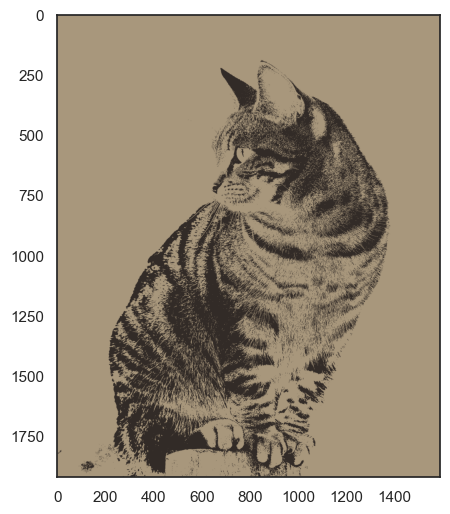

In [18]:
seg = np.zeros(X.shape)
for label in range(2):
    seg[labels == label] = gmm.means_[label]
    
seg = seg.reshape(img.shape).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(seg)

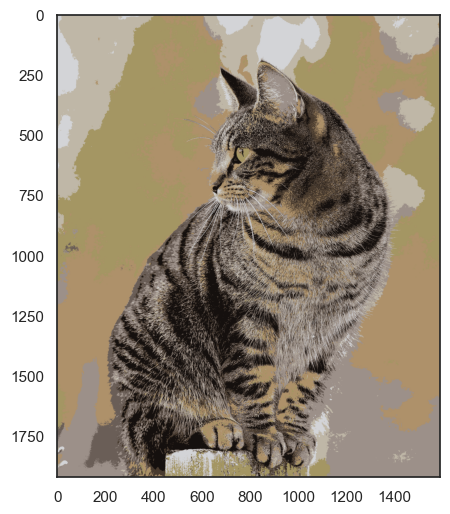

In [19]:
n = 8
gmm = GaussianMixture(n_components=n, covariance_type='tied')
gmm.fit(X)
labels = gmm.predict(X) # num of pixels x 1
seg = np.zeros(X.shape) # num of pixels x 3

for label in range(n):
    seg[labels == label] = gmm.means_[label]
seg = seg.reshape(img.shape).astype(np.uint8)
#cv2.imwrite(f'gauss-cat-{n}.jpeg', seg)

plt.figure(figsize=(6,6))
plt.imshow(seg)
plt.show()

# Exercises


In [20]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%201/customers.csv")
data.to_csv("customers.csv", index=False)
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Living_Status,Children
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,0,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,2
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,1,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,1,1


In [21]:
data.shape

(2216, 19)

In [23]:
ss = StandardScaler()
X = ss.fit_transform(data)

In [24]:
from sklearn.decomposition import PCA


pca2 = PCA(n_components=2)
reduced_2_PCA = pca2.fit_transform(X)

In [25]:
model = GaussianMixture().fit(reduced_2_PCA)

In [26]:
pca2_pred = model.predict(reduced_2_PCA)

In [27]:
reduced_2_PCA

array([[ 4.37087581, -0.14836013],
       [-2.8022153 ,  0.08353426],
       [ 2.13120731, -0.60282698],
       ...,
       [ 2.00341918, -0.77250373],
       [ 1.85481057,  0.87577443],
       [-2.42474418,  0.9993159 ]])

In [29]:
x = reduced_2_PCA[:,0]
x

array([ 4.37087581, -2.8022153 ,  2.13120731, ...,  2.00341918,
        1.85481057, -2.42474418])

Text(0, 0.5, 'PCA 2')

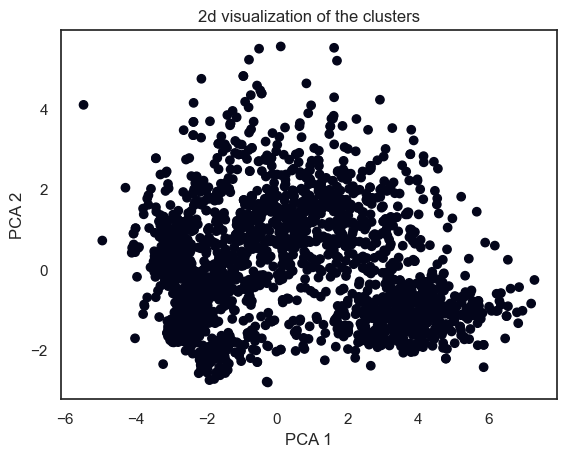

In [31]:
y = reduced_2_PCA[:,1]
plt.scatter(x, y, c=pca2_pred)
plt.title("2d visualization of the clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0.5, 0.92, '3D projection of the clusters')

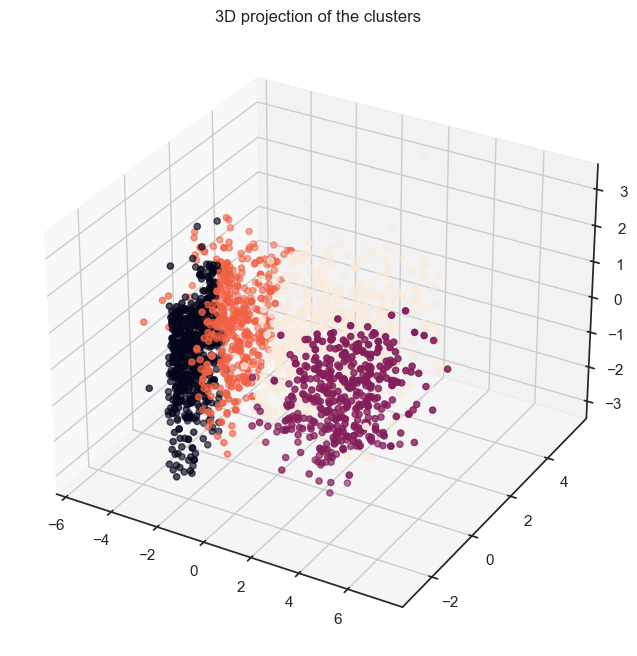

In [32]:
pca3 = PCA(n_components=3)
reduced_3_PCA = pca3.fit(X).transform(X)
mod = GaussianMixture(n_components=4, random_state=0)
PCA_3_pred = mod.fit(reduced_3_PCA).predict(reduced_3_PCA)

# plotting
reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns=(['PCA 1', 'PCA 2', 'PCA 3']))
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(reduced_3_PCA['PCA 1'],reduced_3_PCA['PCA 2'],reduced_3_PCA['PCA 3'], c=PCA_3_pred)
ax.set_title("3D projection of the clusters")

In [34]:
reduced_3_PCA

,PCA 1,PCA 2,PCA 3
0,4.370877,-0.149340,1.292028
1,-2.802215,0.083544,1.229590
2,2.131204,-0.602675,-0.428552
3,-2.447958,-1.132783,0.401340
4,-0.354357,0.248001,0.602452
...,...,...,...
2211,2.828388,1.790930,0.715651
2212,-2.370134,3.676283,0.366925
2213,2.003426,-0.774853,0.186357
2214,1.854811,0.875272,-1.261793
